In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv(r'C:\Users\shubh\OneDrive\Desktop\PythonPractice\D.A.Project\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [10]:
df.shape

(11251, 15)

In [11]:
df.index

RangeIndex(start=0, stop=11251, step=1)

In [12]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [17]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [18]:
df.dropna(inplace=True)

In [19]:
pd.notnull(df).sum()

User_ID             11239
Cust_name           11239
Product_ID          11239
Gender              11239
Age Group           11239
Age                 11239
Marital_Status      11239
State               11239
Zone                11239
Occupation          11239
Product_Category    11239
Orders              11239
Amount              11239
dtype: int64

In [20]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [21]:
df['Amount'] = df['Amount'].astype('int')

In [22]:
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [23]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Exploratory Data Analysis

### Gender Column

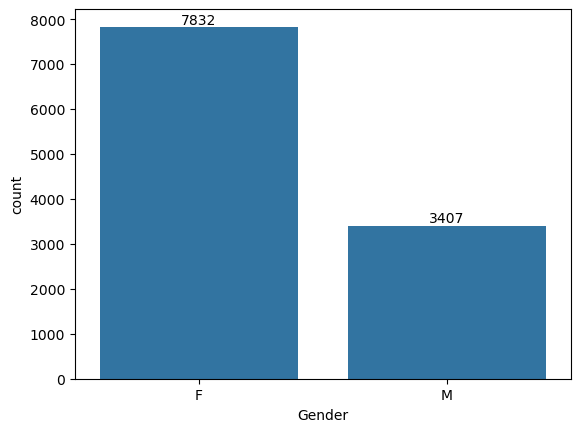

In [24]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

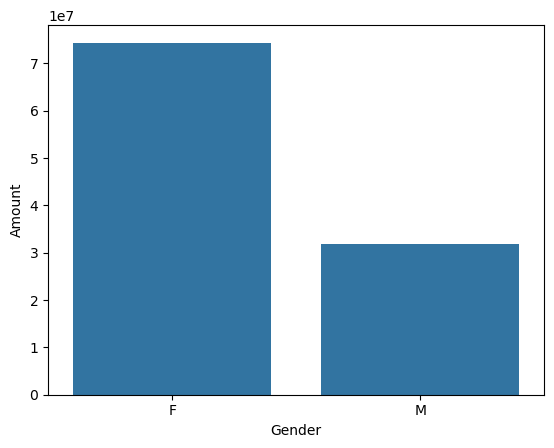

In [26]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than man

### Age Group Column

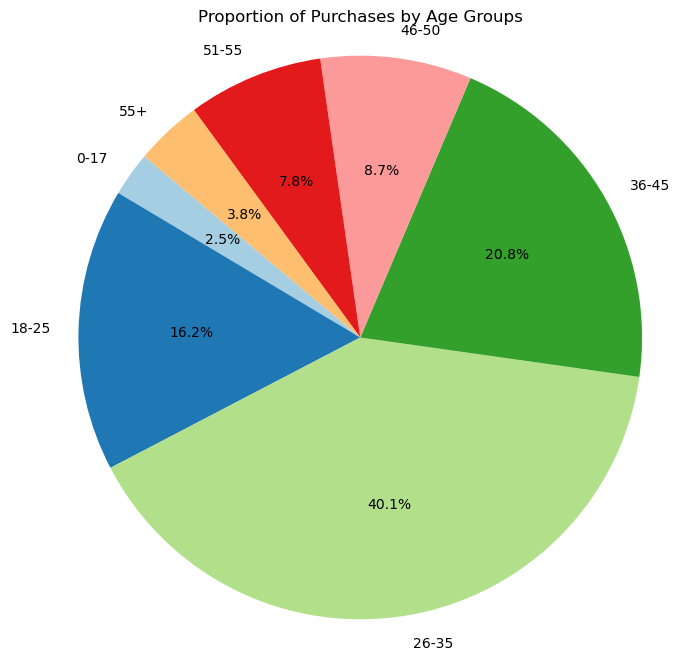

In [27]:
age_group_purchases = df.groupby('Age Group')['Amount'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_purchases, labels=age_group_purchases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Purchases by Age Groups')
plt.axis('equal')
plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

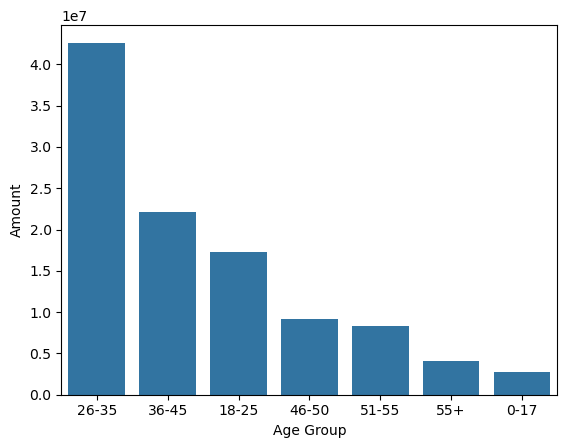

In [28]:
sales_gen = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_gen)

##### From above graphs we can see that most of the buyers are of age group between 26-35yrs female

### State Column

In [31]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


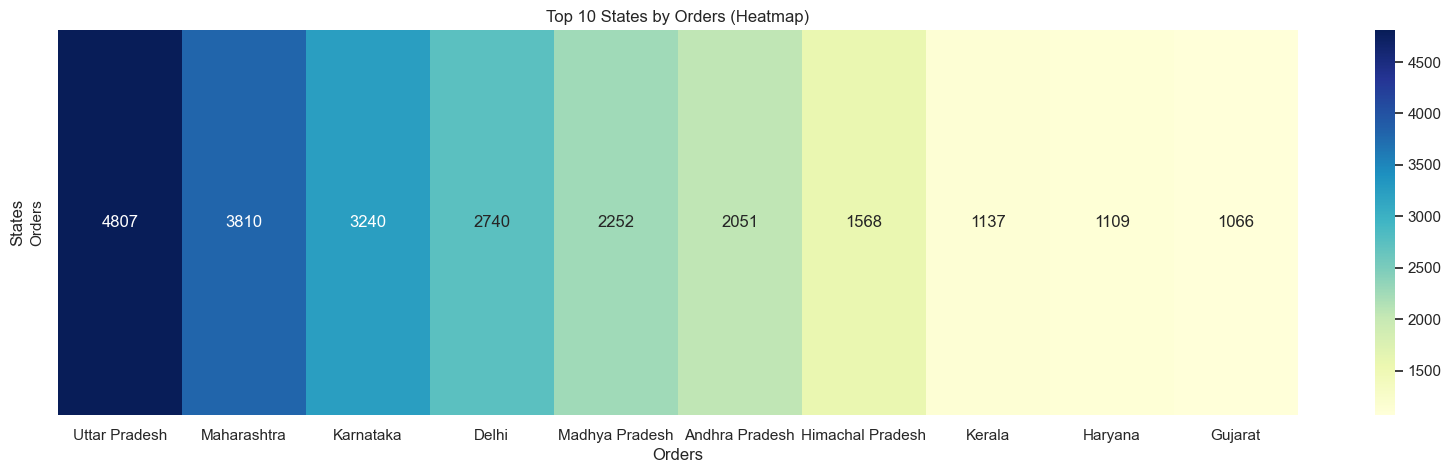

In [32]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sales_pivot = sales_state.set_index('State').T

sns.set(rc={'figure.figsize':(20,5)})

plt.figure(figsize=(20, 5))
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu', cbar=True, fmt='g')

plt.title('Top 10 States by Orders (Heatmap)')
plt.ylabel('States')
plt.xlabel('Orders')

plt.show()

<Axes: xlabel='State', ylabel='Amount'>

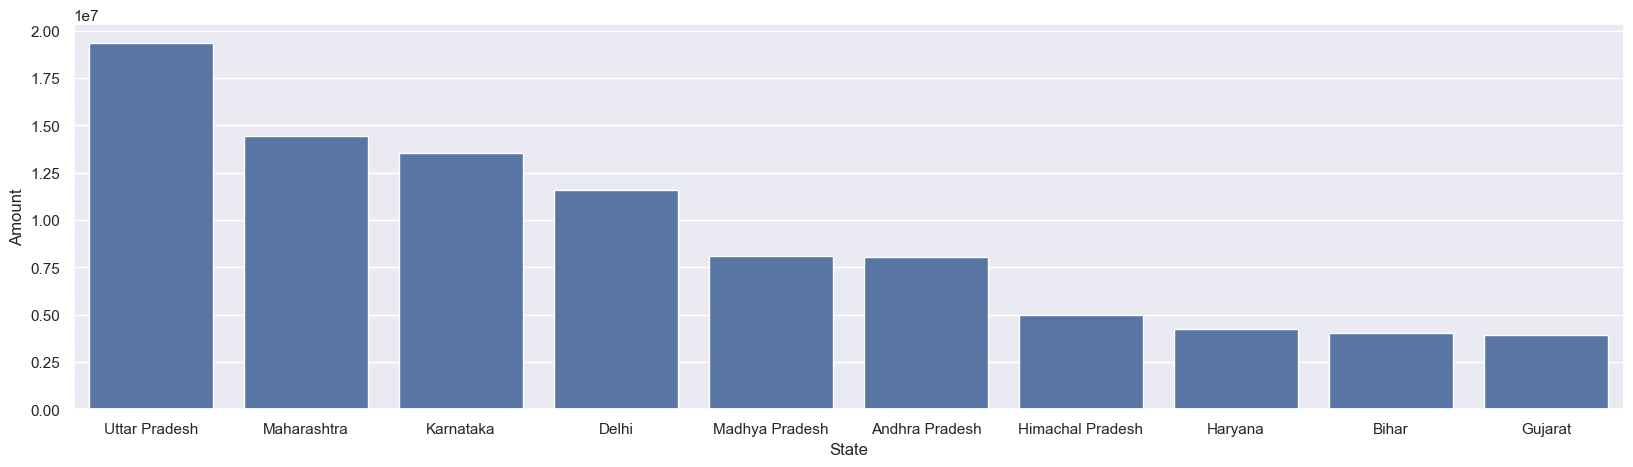

In [33]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

##### From above graphs we can see that most of the orders & total sales/amount are from UP, MAH, KAR respectively.

### Marital Status

In [34]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


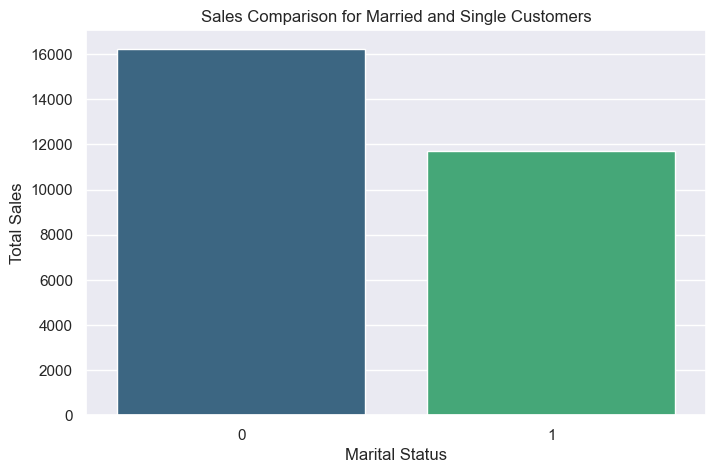

In [44]:
grouped_data = df.groupby('Marital_Status', as_index=False)['Orders'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_data, x='Marital_Status', y='Orders', hue='Marital_Status', palette='viridis', legend=False)

plt.title('Sales Comparison for Married and Single Customers')
plt.xlabel('Marital Status')
plt.ylabel('Total Sales')

plt.show()

<Axes: xlabel='Marital_Status', ylabel='Amount'>

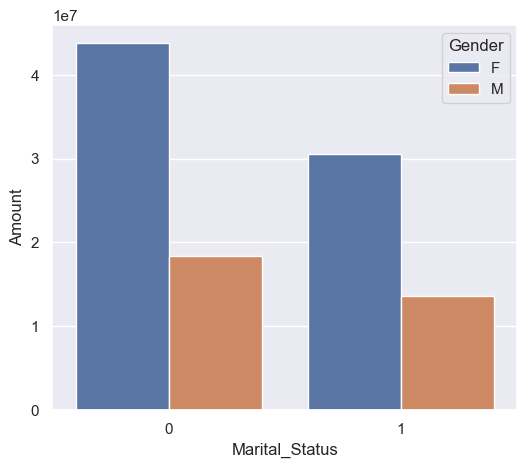

In [45]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

##### From above graphs we can see that most of the buyers are married(women) and they have high purchasing power.

### Occupation Column

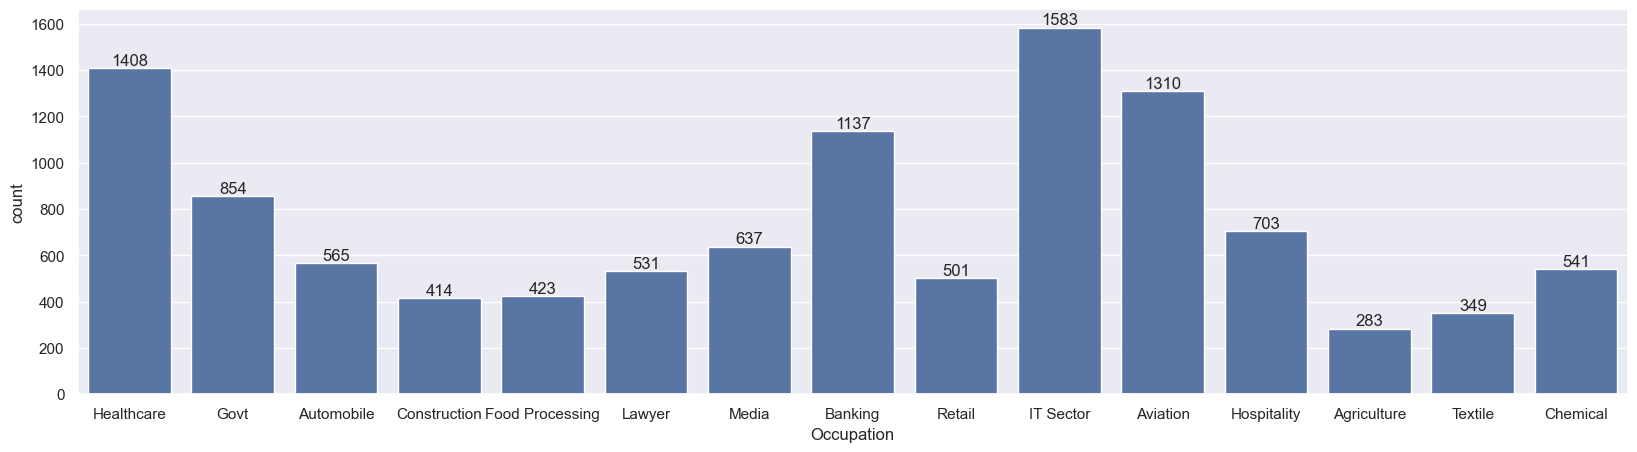

In [46]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

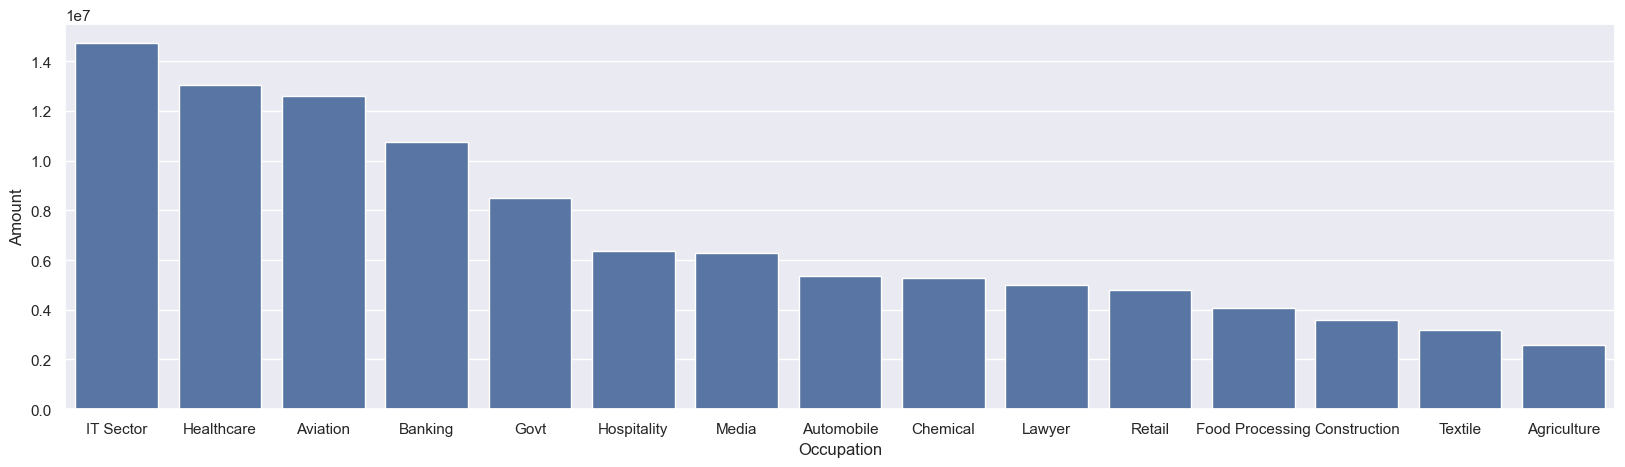

In [47]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

##### From above graphs we can see that most of the buyers are working in IT, Health, Aviation.

### Product Category Column

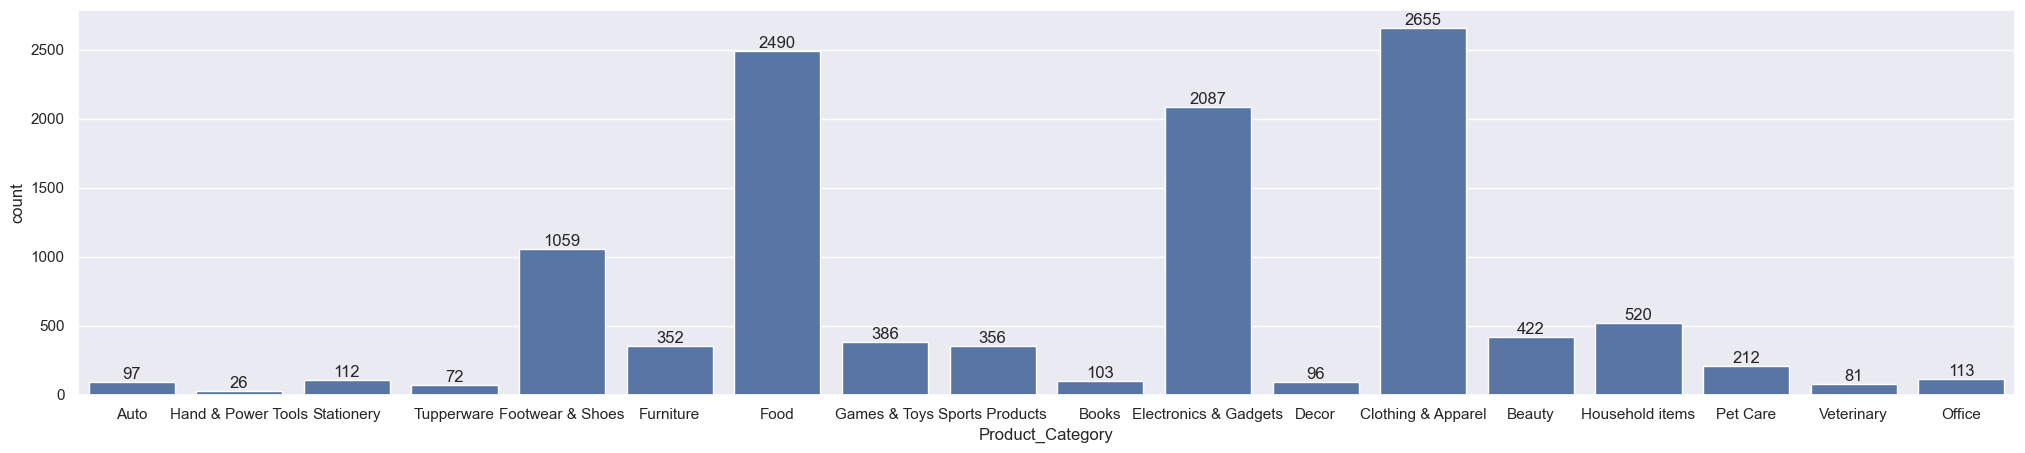

In [48]:
sns.set(rc = {'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

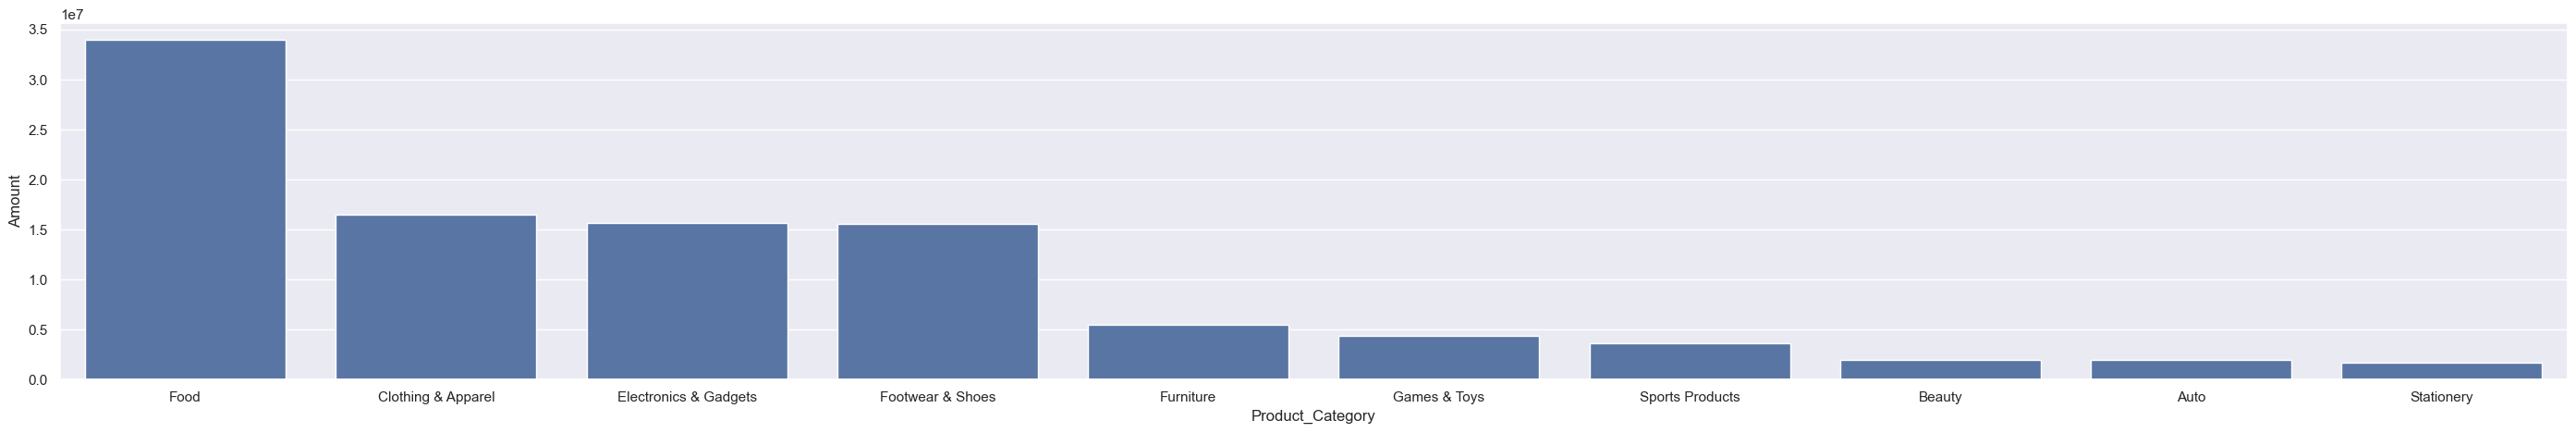

In [49]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (35,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount') 

##### From above graphs we can see that most of the sold products are food, Clothing and Electronics.

<Axes: xlabel='Product_ID', ylabel='Orders'>

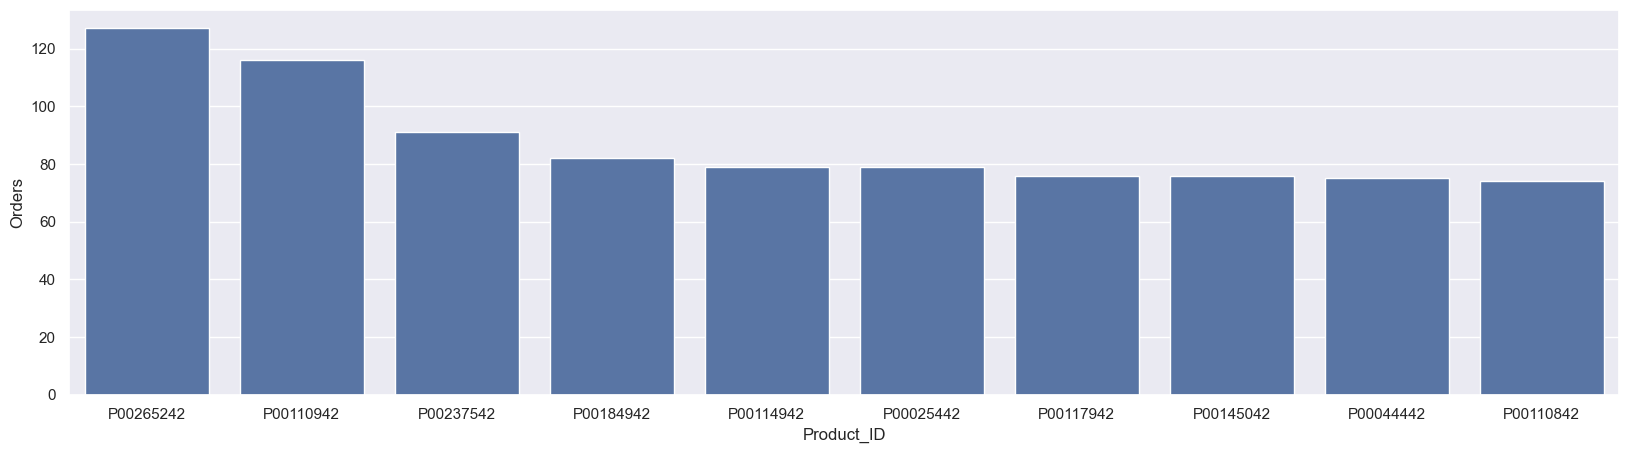

In [43]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

<Axes: xlabel='Product_ID'>

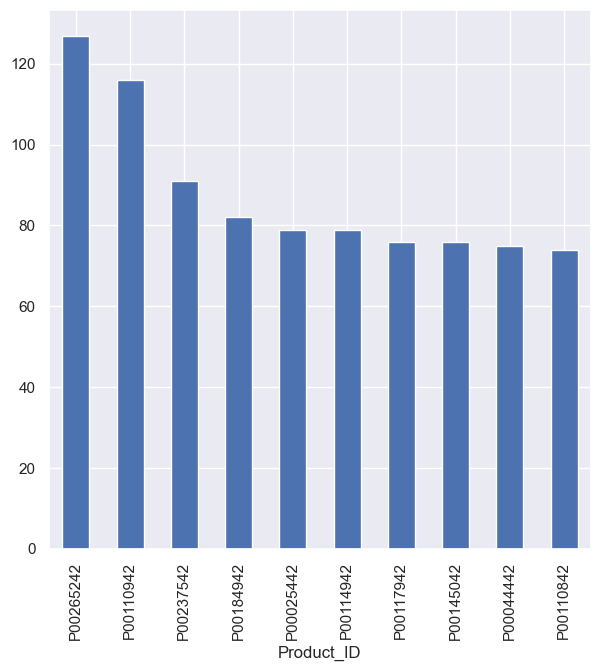

In [70]:
fig1, ax1 = plt.subplots(figsize=(7,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')